# Food Recommedation System

In [31]:
# Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt



In [32]:
# Load the data

data = pd.read_csv('food_survey.csv')

# Data Preprocessing

In [33]:
data.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


In [34]:
food_type_counts = data['C_Type'].value_counts()
print(food_type_counts)

C_Type
Indian          88
Healthy Food    58
Dessert         53
Chinese         27
Italian         25
Snack           23
Thai            23
French          22
Mexican         21
Japanese        18
Beverage        11
Nepalese        11
Korean           9
Vietnames        9
 Korean          1
Spanish          1
Name: count, dtype: int64


In [35]:
veg_non_counts = data['Veg_Non'].value_counts()
print(veg_non_counts)

Veg_Non
veg        238
non-veg    162
Name: count, dtype: int64


In [36]:
# Split the 'Describe' column by ', ' and explode the list into separate rows
ingredients_df = data.assign(Ingredient=data['Describe'].str.split(', ')).explode('Ingredient')

# Drop the original 'Describe' column as it's no longer needed
ingredients_df = ingredients_df.drop(columns=['Describe'])

ingredients_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3981 entries, 0 to 399
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Food_ID     3981 non-null   int64 
 1   Name        3981 non-null   object
 2   C_Type      3981 non-null   object
 3   Veg_Non     3981 non-null   object
 4   Ingredient  3981 non-null   object
dtypes: int64(1), object(4)
memory usage: 186.6+ KB


In [37]:
missing_values_count = data.isna().sum()
print(missing_values_count)

Food_ID     0
Name        0
C_Type      0
Veg_Non     0
Describe    0
dtype: int64


In [38]:
num_recipes = data['Name'].nunique()
print(f'There are {num_recipes} unique recipes in the data.')

There are 400 unique recipes in the data.


In [39]:
# Group by Food_ID and count the number of ingredients for each dish
ingredient_counts_per_dish = ingredients_df.groupby('Food_ID').size()

# Find the minimum and maximum number of ingredients in a single dish
min_ingredients = ingredient_counts_per_dish.min()
max_ingredients = ingredient_counts_per_dish.max()

print(f'The minimum number of ingredients in a single dish is {min_ingredients}.')
print(f'The maximum number of ingredients in a single dish is {max_ingredients}.')

The minimum number of ingredients in a single dish is 1.
The maximum number of ingredients in a single dish is 34.


In [40]:
# Get the descriptive statistics for the number of ingredients per dish
ingredient_stats = ingredient_counts_per_dish.describe()

# Extract the required statistics
min_ingredients = ingredient_stats['min']
q1_ingredients = ingredient_stats['25%']
median_ingredients = ingredient_stats['50%']
q3_ingredients = ingredient_stats['75%']
max_ingredients = ingredient_stats['max']

print(f'Minimum number of ingredients per dish: {min_ingredients}')
print(f'First quartile (Q1) of ingredients per dish: {q1_ingredients}')
print(f'Median (Q2) number of ingredients per dish: {median_ingredients}')
print(f'Third quartile (Q3) of ingredients per dish: {q3_ingredients}')
print(f'Maximum number of ingredients per dish: {max_ingredients}')

Minimum number of ingredients per dish: 1.0
First quartile (Q1) of ingredients per dish: 6.0
Median (Q2) number of ingredients per dish: 9.0
Third quartile (Q3) of ingredients per dish: 13.0
Maximum number of ingredients per dish: 34.0


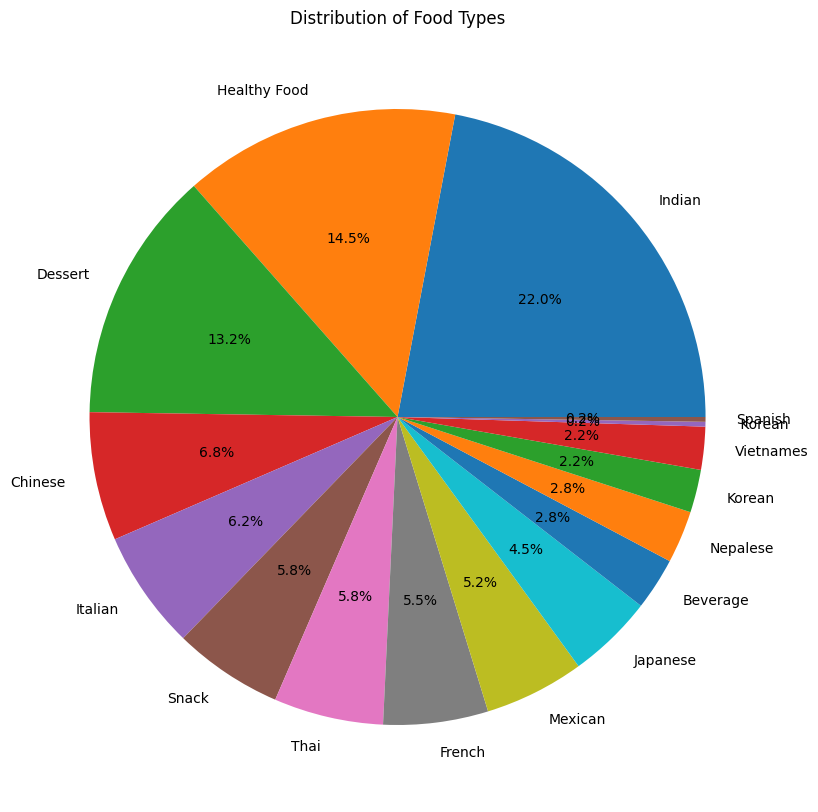

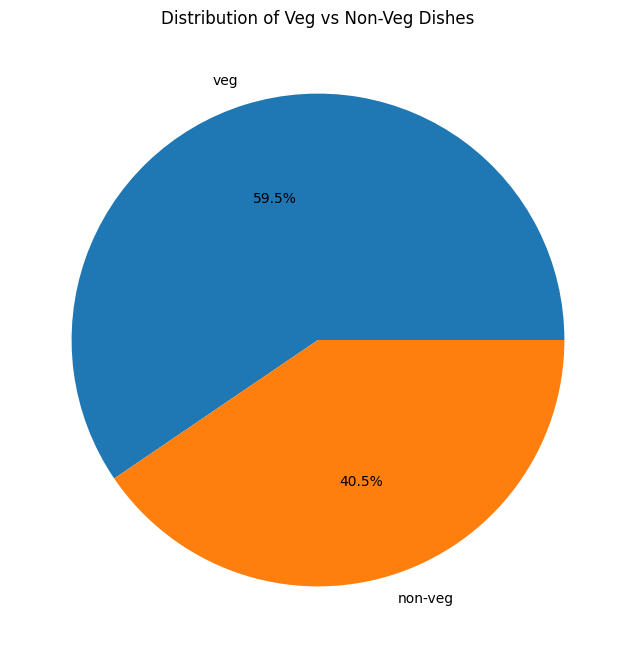

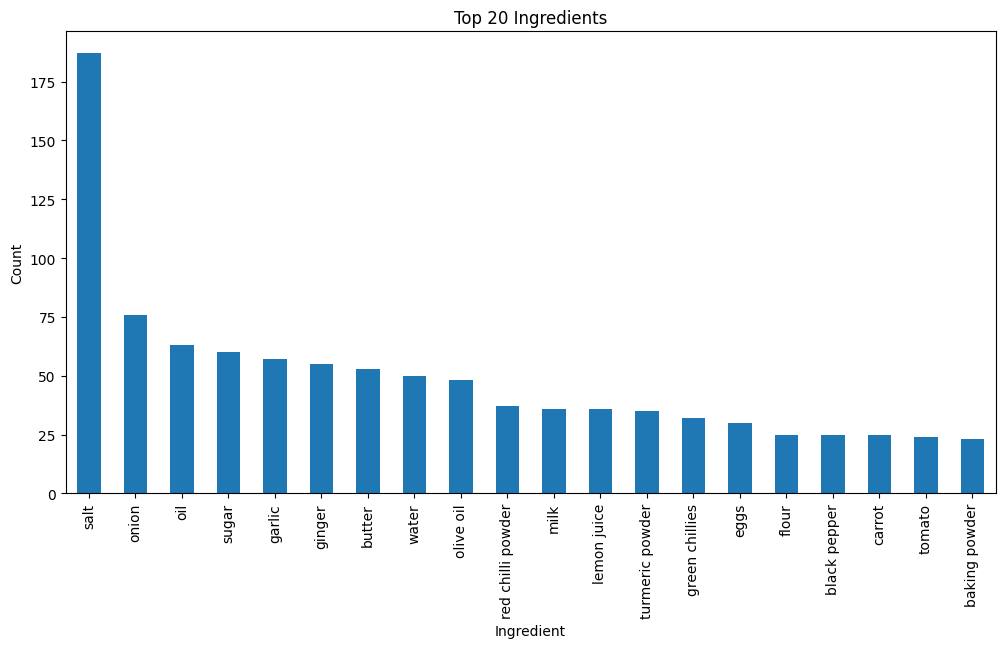

In [41]:
# Distribution of Food Types
food_type_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), title='Distribution of Food Types')
plt.ylabel('')
plt.show()

# Distribution of Veg vs Non-Veg Dishes
veg_non_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Distribution of Veg vs Non-Veg Dishes')
plt.ylabel('')
plt.show()

# Convert all ingredients to lowercase
ingredients_df['Ingredient'] = ingredients_df['Ingredient'].str.lower()

# Top 20 Ingredients
ingredient_counts = ingredients_df['Ingredient'].value_counts()
ingredient_counts.head(20).plot(kind='bar', figsize=(12, 6), title='Top 20 Ingredients')
plt.xlabel('Ingredient')
plt.ylabel('Count')
plt.show()

In [42]:
ratings = pd.read_csv('ratings.csv')

In [43]:
# Drop rows with missing values
ratings = ratings.dropna()

# Convert User_ID and Food_ID to integers
ratings['User_ID'] = ratings['User_ID'].astype(int)
ratings['Food_ID'] = ratings['Food_ID'].astype(int)

# Ensure Rating is a float
ratings['Rating'] = ratings['Rating'].astype(float)

# Display the first few rows of the preprocessed ratings data
ratings.head()

,User_ID,Food_ID,Rating
0,1,88,4.0
1,1,46,3.0
2,1,24,5.0
3,1,25,4.0
4,2,49,1.0


In [44]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 0 to 510
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_ID  511 non-null    int64  
 1   Food_ID  511 non-null    int64  
 2   Rating   511 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 16.0 KB


In [45]:
missing_values_count = data.isna().sum()
print(missing_values_count)

Food_ID     0
Name        0
C_Type      0
Veg_Non     0
Describe    0
dtype: int64


In [46]:
ratings['Rating'].describe()

count    511.000000
mean       5.438356
std        2.866236
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Rating, dtype: float64

Colaborate Filtter

In [47]:
text = data['Name'].str.lower()

In [48]:
text = text.astype(str).tolist()

In [49]:
text

['summer squash salad',
 'chicken minced salad',
 'sweet chilli almonds',
 'tricolour salad',
 'christmas cake',
 'japanese curry arancini with barley salsa',
 'chocolate nero cookies',
 'lamb and chargrilled bell pepper soup',
 'cream of almond soup',
 'broccoli and almond soup',
 'coconut lime quinoa salad',
 'lemon honey glazed sous vide corn on the cob',
 'watermelon and strawberry smoothie',
 'peach, raspberry and nuts smoothie',
 'almond and cranberry poha',
 'almond and raw banana galawat',
 'baked namakpara with roasted almond dip',
 'grilled almond barfi',
 'baked shankarpali ',
 'baked multigrain murukku',
 'apple rabdi',
 'baked namak para',
 'dates and nuts ladoo',
 'green lentil dessert fudge',
 'cashew nut cookies',
 'almond pearls',
 'hawaiin papaya salad',
 'vegetable som tam salad',
 'spinach and feta crepes',
 'couscous with ratatouille - tangy tomato sauce',
 'baked almond kofta',
 'almond and amaranth ladoo',
 'moong dal kiwi coconut soup',
 'mixed berry & banana sm

## Embedding the Name of the food into vector by using OpenAI Text Embedding

In [50]:
#import openai
#from embedding_processor import EmbeddingProcessor as ep

# Initialize the EmbeddingProcessor
#embedding_processor_instance = ep()

# Generate embeddings
#after_embedding = embedding_processor_instance.generate_embedding(texts=text)

In [51]:
#save the embeddings to csv file
#after_embedding = pd.DataFrame(after_embedding)
#after_embedding.to_csv('embeddings.csv', index=False)

In [63]:
from embedding_processor import EmbeddingProcessor as ep
from calculate_cosine import CalculateCosine as cc
after_embedding= pd.read_csv('embeddings.csv')
after_embedding = after_embedding.to_numpy()



In [64]:
# Calculate cosine similarity of all embeddings with the first embedding
compare = [cc.calculate_cosine_similarity(after_embedding[0], embedding) for embedding in after_embedding]

# Print the comparison results
print(compare)

[np.float64(0.9999999999999984), np.float64(0.48430290097535106), np.float64(0.30368598178783235), np.float64(0.49404158661036807), np.float64(0.2479780091944277), np.float64(0.39780014851113055), np.float64(0.2059388920921464), np.float64(0.36798584258653233), np.float64(0.36170258372806907), np.float64(0.40862315328918747), np.float64(0.5290749720001056), np.float64(0.36292562788189014), np.float64(0.3450433664801804), np.float64(0.3159021182314748), np.float64(0.30653512401928523), np.float64(0.2938669583693672), np.float64(0.3062861567475792), np.float64(0.2829655421945428), np.float64(0.3049474447061377), np.float64(0.2795323681761569), np.float64(0.2796286344472757), np.float64(0.2745863202086511), np.float64(0.2707646954311661), np.float64(0.3275155177468389), np.float64(0.2852175105445363), np.float64(0.25682019001886675), np.float64(0.46290355254425136), np.float64(0.5294214297101666), np.float64(0.36996811928225126), np.float64(0.47622556596874976), np.float64(0.2913557492731

In [65]:
# Get the indices of the top 10 highest similarity scores
top_10_indices = np.argsort(compare)[-10:][::-1]

# Retrieve the corresponding food names and their scores
top_10_foods = data.iloc[top_10_indices][['Name']].copy()
top_10_foods['Score'] = [compare[i] for i in top_10_indices]

# Print the top 10 food names with their scores
print("Top 10 Food Items based on similarity scores:")
for i, (food, score) in enumerate(zip(top_10_foods['Name'], top_10_foods['Score']), 1):
    print(f"{i}. {food} - Score: {score:.4f}")

Top 10 Food Items based on similarity scores:
1. summer squash salad - Score: 1.0000
2. Basmati Rice with Summer Vegetable Salad - Score: 0.6053
3. Cucumber and Radish Salad - Score: 0.5691
4. Parmesan Cauliflower and Parsley Salad - Score: 0.5386
5. mixed salad with lotus root - Score: 0.5324
6. fruit cube salad - Score: 0.5321
7. Shirazi Salad - Score: 0.5295
8. vegetable som tam salad - Score: 0.5294
9. coconut lime quinoa salad - Score: 0.5291
10. mixed beans salad - Score: 0.5272


# Using gemini text embedding

In [ ]:
from gemini_embedding import EmbeddingProcessor as gep

# Initialize the GeminiEmbedding class
#gemini_embedding_processor = gep()

# Generate embeddings
#after_embedding_gemini = gemini_embedding_processor.generate_embedding(texts=text)

In [72]:
after_embedding

array([[-0.02381785, -0.02229001, -0.00670815, ...,  0.01901608,
        -0.0067252 ,  0.01510101],
       [-0.011084  , -0.01302267, -0.00546665, ...,  0.05009037,
         0.00506932,  0.02192139],
       [-0.02464468,  0.01450586, -0.00596829, ...,  0.00965117,
         0.01930233, -0.00119821],
       ...,
       [-0.01359238, -0.02275102, -0.01848934, ...,  0.01309606,
         0.00924467,  0.00757044],
       [-0.02141873, -0.0039209 , -0.02044644, ...,  0.00976525,
         0.00573867,  0.01779728],
       [-0.02362238,  0.00698437, -0.0126341 , ...,  0.02638846,
         0.00205036,  0.02655443]])

In [74]:
# Convert the list to a DataFrame
#after_embedding_gemini_df = pd.DataFrame(after_embedding_gemini)

# Save the DataFrame to a CSV file
#after_embedding_gemini_df.to_csv('after_embedding_gemini.csv', index=False)

In [75]:
after_embedding_gemini_df = pd.read_csv('after_embedding_gemini.csv')

In [76]:
# Calculate cosine similarity of all embeddings with the first embedding
compare = [cc.calculate_cosine_similarity(after_embedding_gemini[0], embedding) for embedding in after_embedding_gemini]

# Print the comparison results
print(compare)

[np.float64(1.0000000000000002), np.float64(0.573388824494741), np.float64(0.43053034904643944), np.float64(0.5651259909673004), np.float64(0.35774578310502936), np.float64(0.4782290662582736), np.float64(0.32804395874486236), np.float64(0.41337912909691304), np.float64(0.38874533285108526), np.float64(0.43160967938220257), np.float64(0.5890521973062721), np.float64(0.4110459994242185), np.float64(0.46816255748556246), np.float64(0.47084304036022234), np.float64(0.3782458694559102), np.float64(0.4058495126309979), np.float64(0.39418115549659827), np.float64(0.36821090884251534), np.float64(0.36874451289845916), np.float64(0.3541453124963808), np.float64(0.27957865924180253), np.float64(0.37885982726099876), np.float64(0.3748559167169298), np.float64(0.40120065408588007), np.float64(0.38492598874043), np.float64(0.30721155179066095), np.float64(0.554915062991249), np.float64(0.6036209512992484), np.float64(0.44957225477304497), np.float64(0.5165994728426385), np.float64(0.37280936190668

In [77]:
# Get the indices of the top 10 highest similarity scores
top_10_indices = np.argsort(compare)[-10:][::-1]

# Retrieve the corresponding food names and their scores
top_10_foods = data.iloc[top_10_indices][['Name']].copy()
top_10_foods['Score'] = [compare[i] for i in top_10_indices]

# Print the top 10 food names with their scores
print("Top 10 Food Items based on similarity scores:")
for i, (food, score) in enumerate(zip(top_10_foods['Name'], top_10_foods['Score']), 1):
    print(f"{i}. {food} - Score: {score:.4f}")

Top 10 Food Items based on similarity scores:
1. summer squash salad - Score: 1.0000
2. Basmati Rice with Summer Vegetable Salad - Score: 0.6967
3. Cucumber and Radish Salad - Score: 0.6766
4. Parmesan Cauliflower and Parsley Salad - Score: 0.6212
5. fruit cube salad - Score: 0.6135
6. vegetable som tam salad - Score: 0.6036
7. Miso-Butter Roast Chicken With Acorn Squash Panzanella - Score: 0.5999
8. mixed beans salad - Score: 0.5947
9. veg summer rolls - Score: 0.5898
10. coconut lime quinoa salad - Score: 0.5891
